# Homework 4:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [9]:
setwd("~/Documents/GradSchool/Coursework/S22/85-732/DataSciencePsychNeuro/Homeworks/")

In [10]:
#For personal reference - HCP metadata
INFO <- read.csv(file = './hcp_data/HCP_S1200_DataDictionary_April_20_2018.csv')
INFO

fullDisplayName,category,assessment,columnHeader,description
<chr>,<chr>,<chr>,<chr>,<chr>
Subject,Subject Information,Demographics,Subject,HCP Subject ID
Quarter Released,Subject Information,Demographics,Release,HCP data release in which this subject's data was initially published to ConnectomeDB. Note: 'Release' does not indicate the version of the pipelines used to process subject data. Check the release-notes distributed with each processed dataset for pipeline version information.
Acquisition Quarter,Subject Information,Demographics,Acquisition,Quarter in which this subject's data was initially acquired.
Gender,Subject Information,Demographics,Gender,Gender of Subject
Age Range,Subject Information,Demographics,Age,"Age group of Participant, banded in five-year increments."
Age Range,Subject Information,Demographics,Age,Age group of Participant.
Age Range,Subject Information,Demographics,Age,Age group of Participant.
Age in Years,Subject Information,Demographics,Age_in_Yrs,Age of Participant in Years
HasGT,Subject Information,Demographics,HasGT,"Genotyping data available from at least one of the 2 gene chips used: (1) Illumina Mega Chip plus content from the Illumina ImmunoArray and PsychArray; (2) Illumina Neuro Consortium Array. Family structure (i.e., Mother_ID and Father_ID) is genetically verified for pairs of siblings (includings twins and half-silbings) for whom HasGT=TRUE"


In [12]:
library(tidyverse)

hcpdata <- read.csv(file = './hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv')

head(hcpdata)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


In [24]:
myvars <- c("Subject", "Gender", "Flanker_Unadj", "FS_Tot_WM_Vol", "FS_Total_GM_Vol")
d1 <- na.omit(hcpdata[myvars])

#Convert Gender Strings to Doubles
d1$Gender <- gsub('M','0',d1$Gender)
d1$Gender <- gsub('F','1',d1$Gender)
d1$Gender <- as.numeric(d1$Gender)

head(d1)

,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<dbl>,<dbl>,<int>,<int>
2,100206,0,130.42,543134,807245
3,100307,1,112.56,407292,664124
4,100408,0,121.18,500417,726206
5,100610,0,126.53,512946,762308
6,101006,1,101.85,429449,579632
7,101107,0,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

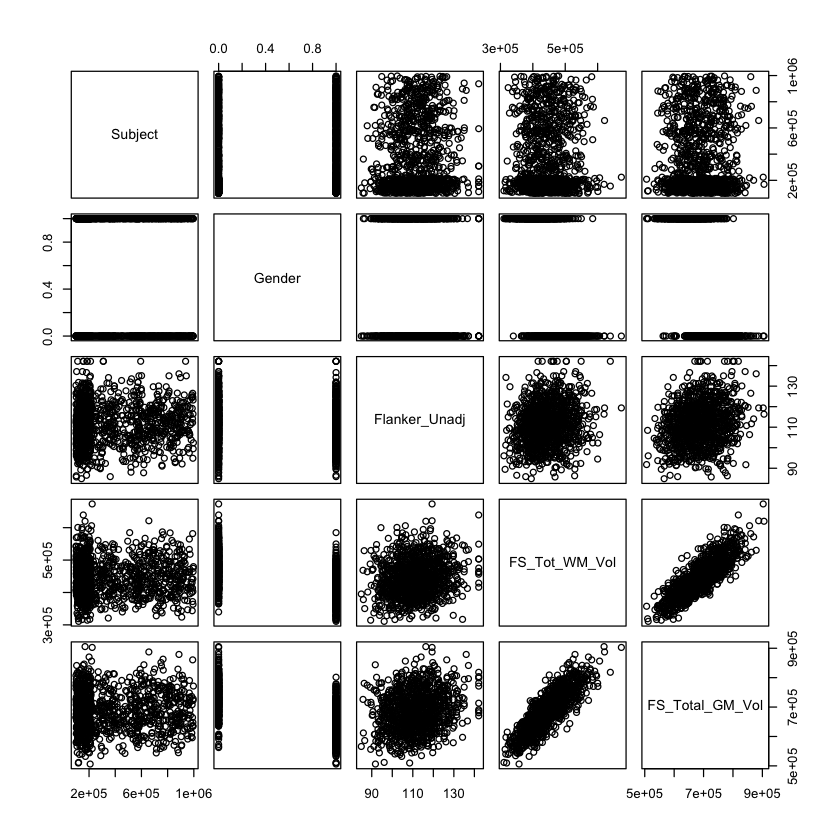

In [25]:
pairs(d1)

Two side notes: 

1. Directionality of Gender trends are dictated by my above mapping.
    
2. These plots, much like a covariance matrix, are mirrored about the major diagonal, so any positive trend of X vs. Y is the same as a negative trend in Y vs. X


**Positive correlation:** 
* FS_Tot_WM_Vol vs FS_Total_GM_Vol
* Flanker_Unadj vs FS_Tot_WM_Vol (slight +)
* Flanker_Unadj vs FS_Total_GM_Vol (slight +)

**Negative correlation:**
* Gender vs. FS_Total_GM_Vol
* Gender vs. FS_Total_WM_Vol

**No correlation:**
* Subject vs. anything (why would it?)

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [32]:
model_fit <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, data=d1)

summary(model_fit)


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


In [30]:
coef(model_fit)

(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

In [31]:
confint(model_fit)

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


The t-test results for the computed coefficients return p-values of $p < 2e-16$ and $p = 3.18e-12$ for $\beta_0$ and $\beta_1$, respectively, which means we are *very* confident about the relationship between grey matter volume and unadjusted flanker task performance.

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula 'y ~ x'



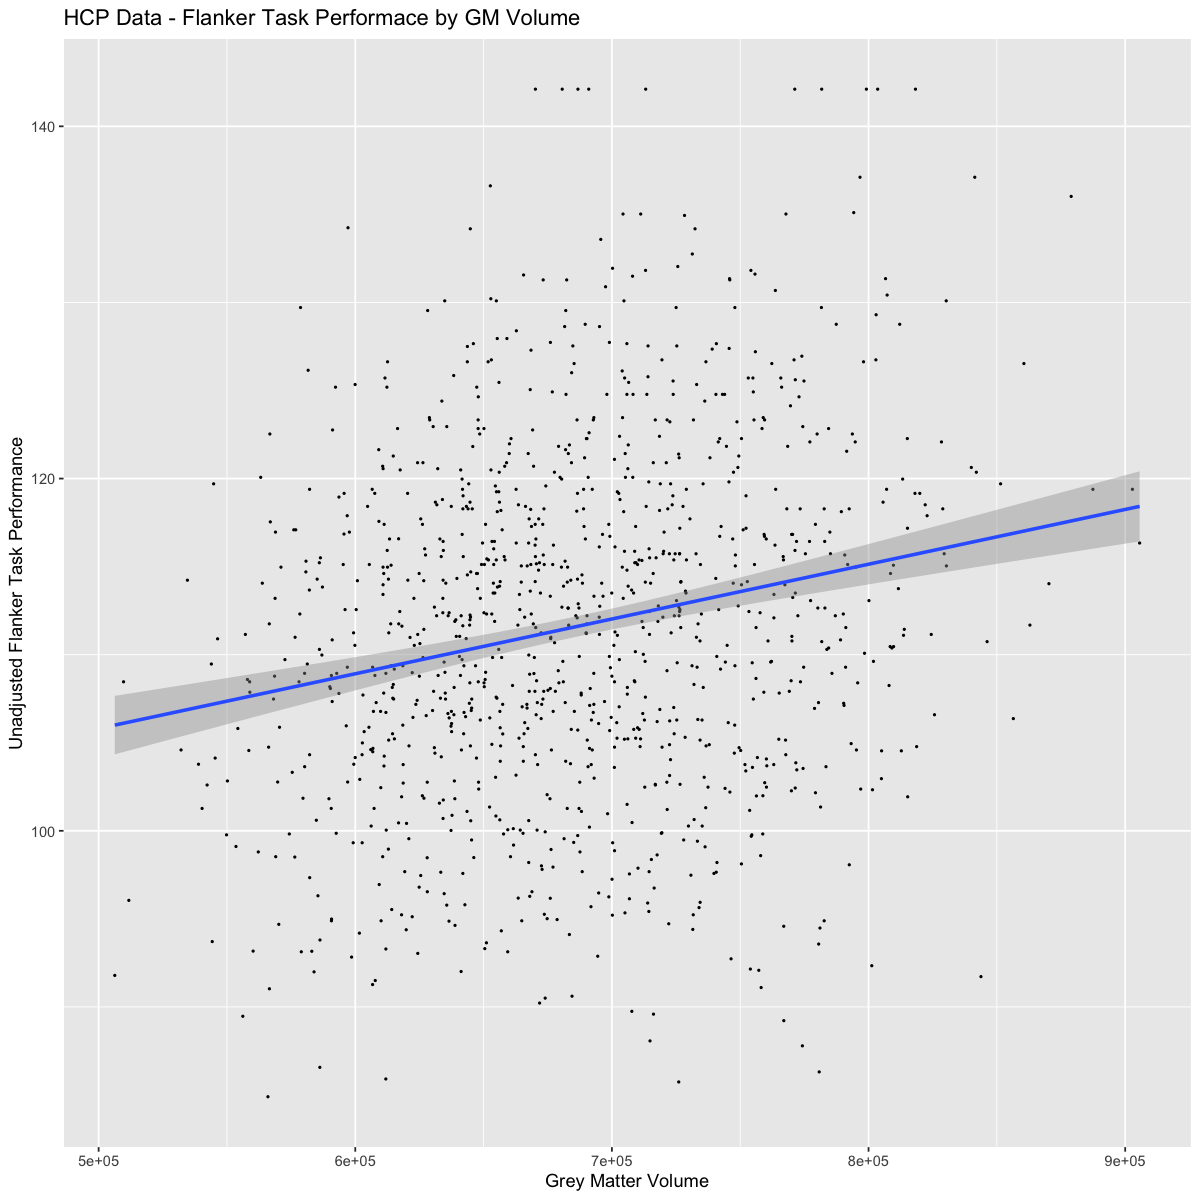

In [42]:
library("ggplot2")
options(repr.plot.width = 10, repr.plot.height = 10)
p <- ggplot(data = d1, aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) +
    geom_point(size=0.25) +
    xlab("Grey Matter Volume") +
    ylab("Unadjusted Flanker Task Performance") +
    ggtitle("HCP Data - Flanker Task Performace by GM Volume") +
    geom_smooth(method='lm')
p

Like we saw by eyeballing with *pairs*, there is a positive relationship between greay matter volume and flanker test performance. That said, the 95% confidence intervals are relatively tight compared to the residuals -- in fact, the majority of points fall *outside* the 95% CIs, which is to say there is more variability in the results than the model would imply.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

Increasing grey matter volume shows positive correlation with Flanker Task Performance. 

This feels a little "soft," but I am not confident what else we can claim without overstepping.

**DUE:** 5pm EST, March 4, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*